# Principal component analysis

#### Variance, covariance, and covariance matrices

In [13]:
import numpy as np

X = np.array([
    [2, 0, -1.4],
    [2.2, 0.2, -1.5],
    [2.4, 0.1, -1],
    [1.9, 0, -1.2]
])

print(np.cov(X).T)

[[ 2.92        3.16        2.95        2.67      ]
 [ 3.16        3.43        3.175       2.885     ]
 [ 2.95        3.175       3.01        2.705     ]
 [ 2.67        2.885       2.705       2.44333333]]


In [14]:
import numpy as np
w, v = np.linalg.eig(np.array([[1, -2], [2, -3]]))
print(w)
print(v)

[-0.99999998 -1.00000002]
[[ 0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


# Visualizing high-dimensional data with PCA

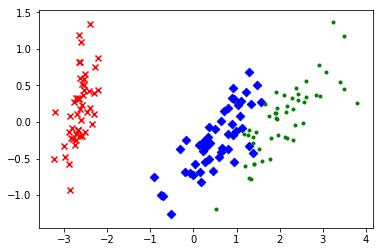

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

### Face recognition with PCA

In [65]:
import os
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from PIL import Image

X = []
y = []

for dirpath, _, filenames in os.walk('att_faces'):
    for filename in filenames:
        if filename[-3:] == 'pgm':
            img = Image.open(os.path.join(dirpath, filename)).convert('L')
            arr = np.array(img).reshape(10304).astype('float32') / 255
            X.append(arr)
            y.append(dirpath)

X = scale(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

In [67]:
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train.shape)
print(X_train_reduced.shape)
classifier = LogisticRegression()
accuracies = cross_val_score(classifier, X_train_reduced, y_train)
print('Cross validation accuracy: %s' % np.mean(accuracies))
classifier.fit(X_train_reduced, y_train)
predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test, predictions))

(300, 10304)
(300, 150)
Cross validation accuracy: 0.791103073156
               precision    recall  f1-score   support

 att_faces\s1       0.50      1.00      0.67         1
att_faces\s10       1.00      1.00      1.00         3
att_faces\s11       1.00      1.00      1.00         2
att_faces\s12       1.00      1.00      1.00         3
att_faces\s13       1.00      1.00      1.00         2
att_faces\s15       1.00      0.60      0.75         5
att_faces\s16       0.50      1.00      0.67         1
att_faces\s17       1.00      1.00      1.00         3
att_faces\s18       1.00      1.00      1.00         3
att_faces\s19       1.00      1.00      1.00         2
 att_faces\s2       0.50      1.00      0.67         2
att_faces\s20       1.00      1.00      1.00         2
att_faces\s21       1.00      0.83      0.91         6
att_faces\s22       1.00      1.00      1.00         4
att_faces\s23       1.00      1.00      1.00         2
att_faces\s24       0.75      1.00      0.86         